<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/Kmeans_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# Demonstration of k-means assumptions


This example is meant to illustrate situations where k-means will produce
unintuitive and possibly unexpected clusters. In the first three plots, the
input data does not conform to some implicit assumption that k-means makes and
undesirable clusters are produced as a result. In the last plot, k-means
returns intuitive clusters despite unevenly sized blobs.



In [ ]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


Automatically created module for IPython interactive environment


In [ ]:
#plt.figure(figsize=(24, 24))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


Text(0.5, 1.0, 'Correct Number of Blobs')

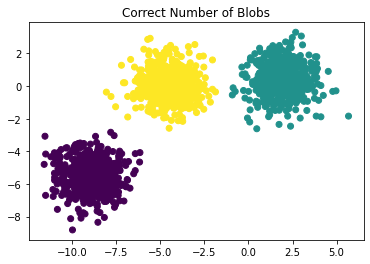

In [ ]:
# correct number of clusters
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Correct Number of Blobs")


Text(0.5, 1.0, 'Incorrect Number of Blobs')

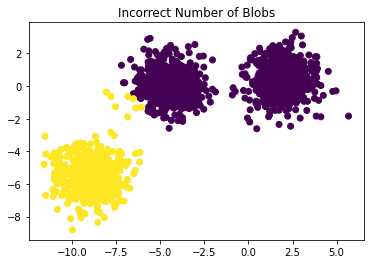

In [ ]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")


Text(0.5, 1.0, 'Anisotropicly Distributed Blobs')

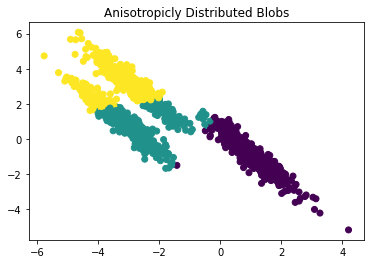

In [ ]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

#plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")


Text(0.5, 1.0, 'Unequal Variance')

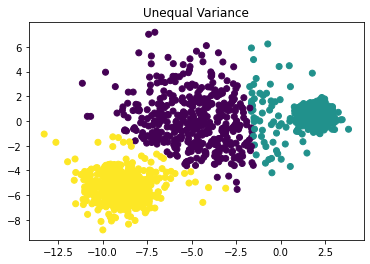

In [ ]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

#plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")


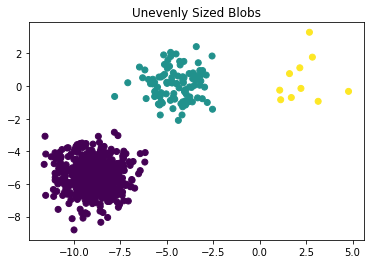

In [ ]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

#plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()